In [119]:
# import required modules
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

%matplotlib inline

In [120]:
# read in data
data = pd.read_csv('../data/raw/pima-indians-diabetes-database/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Feature Engineering

From data analysis it is clear that some features which cannot be zero have zeros values.However they have zero values, like
- BMI: 1.4%
- BloodPressure: 4.6% 
- Glucose: 0.7% 
- SkinThickness: 29.6% 

These are clearly extreme outliers that might be caused by data entry issues, so these records need to be removed.

In [121]:
# removing records having BMI and BloodPressure as zero
clean_data = data[(data.BMI!=0) & (data.BloodPressure!=0) & (data.Glucose!=0) & (data.SkinThickness!=0)].copy()

## Pregnancies

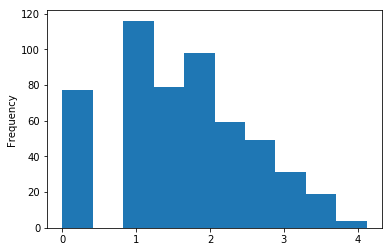

In [122]:
# this feature is right skewed, so to transform it with sqrt function
trans_Pregnancies = np.sqrt(clean_data.Pregnancies)
clean_data['Pregnancies'] = trans_Pregnancies
trans_Pregnancies.plot('hist')

## Glucose

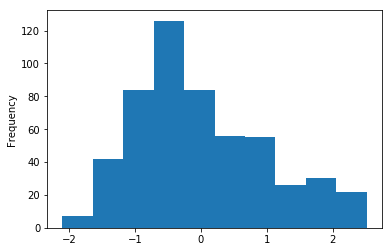

In [123]:
# normalising the feature
clean_data.Glucose = (clean_data.Glucose - clean_data.Glucose.mean())/clean_data.Glucose.std()
clean_data.Glucose.plot('hist')

## BloodPressure

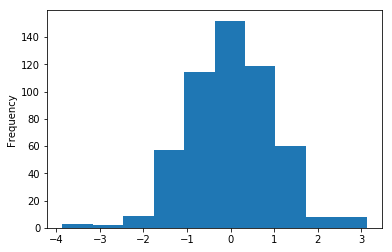

In [124]:
# normalising the feature
clean_data.BloodPressure = (clean_data.BloodPressure - clean_data.BloodPressure.mean())/clean_data.BloodPressure.std()
clean_data.BloodPressure.plot('hist')

## SkinThickness

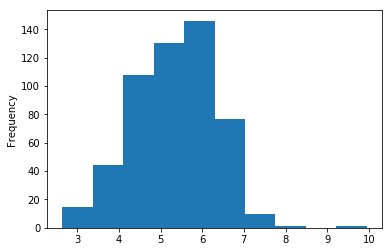

In [125]:
# transform right skewed distribution with sqrt transformation
clean_data.SkinThickness = np.sqrt(clean_data.SkinThickness)
clean_data.SkinThickness.plot('hist')

## Insulin

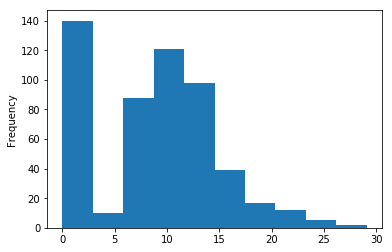

In [126]:
# transform right skewed data with sqrt transformation
clean_data.Insulin = np.sqrt(clean_data.Insulin)
clean_data.Insulin.plot('hist')

## BMI

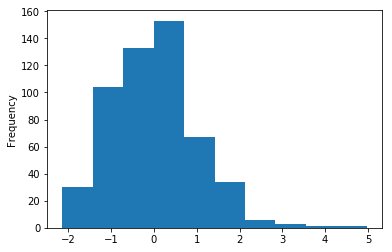

In [127]:
# normalize data
clean_data.BMI = (clean_data.BMI - clean_data.BMI.mean())/clean_data.BMI.std()
clean_data.BMI.plot('hist')

## DiabetesPedigreeFunction

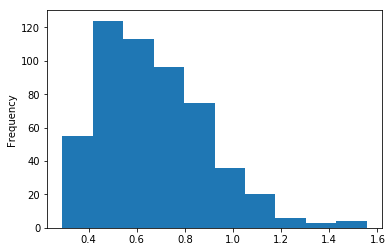

In [128]:
# transform right skewed data with sqrt function
clean_data.DiabetesPedigreeFunction = np.sqrt(clean_data.DiabetesPedigreeFunction)
clean_data.DiabetesPedigreeFunction.plot('hist')

## Age

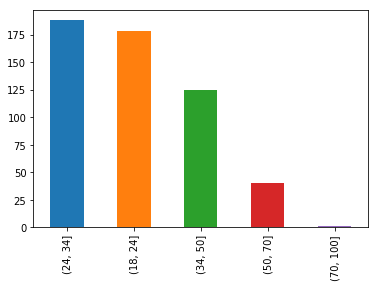

In [129]:
# bin ages 
bins = [18, 24, 34, 50, 70, 100]
clean_data.Age = pd.cut(clean_data.Age, bins, right=True)
clean_data.Age.value_counts().plot('bar')

In [130]:
# save data
clean_data.to_csv('../data/processed/clean_data.csv', index=False)